In [30]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
magnetic_field = 0.060 # T for AD
B_ratio=1e-10



c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

#disp_x=0.12

                                        


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [31]:
cooling_time=[]
num_particles=1

disp_values=np.linspace(-17.5, 17.5, num=100)


     
disp_x=1



arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=disp_x,disp_x_1=disp_x,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0)

delta_single=5e-4

particles = xp.Particles(
        
        mass0=mass0,
        p0c=p0c,
        x=disp_x*delta_single,
        px=0,
        y=0,
        py=0,
        delta=delta_single,
        zeta=0)


cooler = xt.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                        T_perp=T_perp,T_l=T_l,
                                        magnetic_field=magnetic_field,B_ratio=B_ratio,
                                        Neutralisation_space_charge=1,offset_dp=5e-4)

    

num_turns=int(2*1e5)


# initialize arrays
x, px, delta, action_x = [], [], [], []

cutoff=0.75
# loop over turns
for i in tqdm(range(num_turns), desc='Cooling Progress', leave=False):
    delta.append(particles.delta.copy())  
    #delta.append(particles.delta)            
    #print(particles.delta)
    
    # track particle
    arc.track(particles)
    cooler.track(particles)


   
            

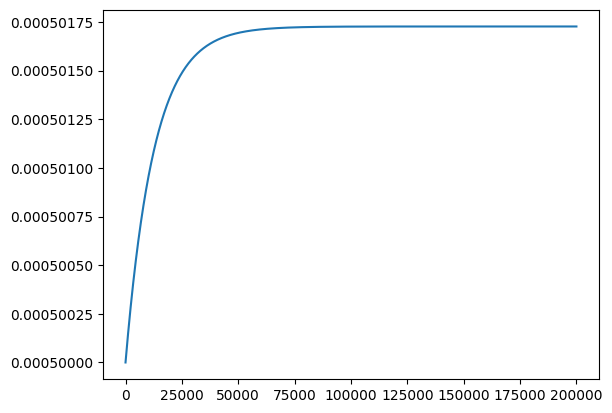

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Your code to generate disp_values and cooling_time

# Create a folder if it doesn't exist
plt.figure()
plt.plot(delta)
plt.show()